1. Importar librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

2. Carga de datos

In [5]:
df = pd.read_csv("C:/Users/Valentina Molina/Documents/Repositorios/Proyecto_Final_MLOps/data/PS_20174392719_1491204439457_log.csv")

In [6]:
# Vista rápida
print("Shape del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head())

Shape del dataset: (6362620, 11)

Primeras filas:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
# Renombrar columnas para mayor claridad
df = df.rename(columns={
    'oldbalanceOrg':'oldBalanceOrig',
    'newbalanceOrig':'newBalanceOrig',
    'oldbalanceDest':'oldBalanceDest',
    'newbalanceDest':'newBalanceDest'
})

df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


3. Exploración inicial

In [8]:
print("Dimensiones del dataset:", df.shape)
print("\nInfo del dataset:")
print(df.info())

Dimensiones del dataset: (6362620, 11)

Info del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldBalanceOrig  float64
 5   newBalanceOrig  float64
 6   nameDest        object 
 7   oldBalanceDest  float64
 8   newBalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [9]:
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
step              0
type              0
amount            0
nameOrig          0
oldBalanceOrig    0
newBalanceOrig    0
nameDest          0
oldBalanceDest    0
newBalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [10]:
print("\nDistribución de la variable objetivo (isFraud):")
print(df['isFraud'].value_counts(normalize=True))


Distribución de la variable objetivo (isFraud):
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


In [12]:
print("\nValores únicos por columna:")
print(df.nunique())


Valores únicos por columna:
step                  743
type                    5
amount            5316900
nameOrig          6353307
oldBalanceOrig    1845844
newBalanceOrig    2682586
nameDest          2722362
oldBalanceDest    3614697
newBalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64


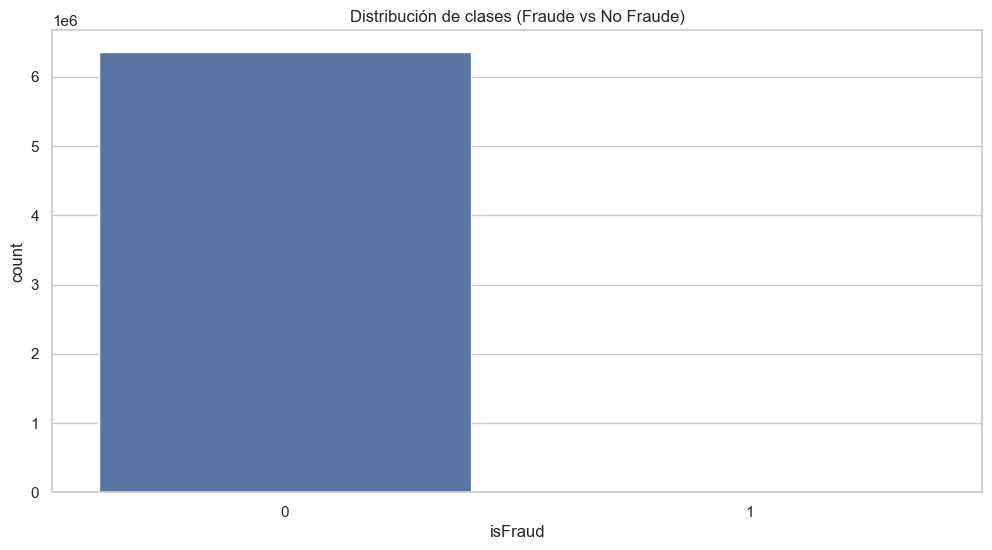

In [11]:
# Visualizar el desbalance
sns.countplot(x="isFraud", data=df)
plt.title("Distribución de clases (Fraude vs No Fraude)")
plt.show()

4. Estadistica

In [13]:
print("\nResumen estadístico de variables numéricas:")
display(df.describe().T)


Resumen estadístico de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldBalanceOrig,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newBalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldBalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newBalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [14]:
print("\nResumen de variables categóricas:")
display(df.describe(include=["object", "category"]).T)


Resumen de variables categóricas:


,count,unique,top,freq
type,6362620,5,CASH_OUT,2237500
nameOrig,6362620,6353307,C1677795071,3
nameDest,6362620,2722362,C1286084959,113


5. EDA (Exploratory Data Analysis)

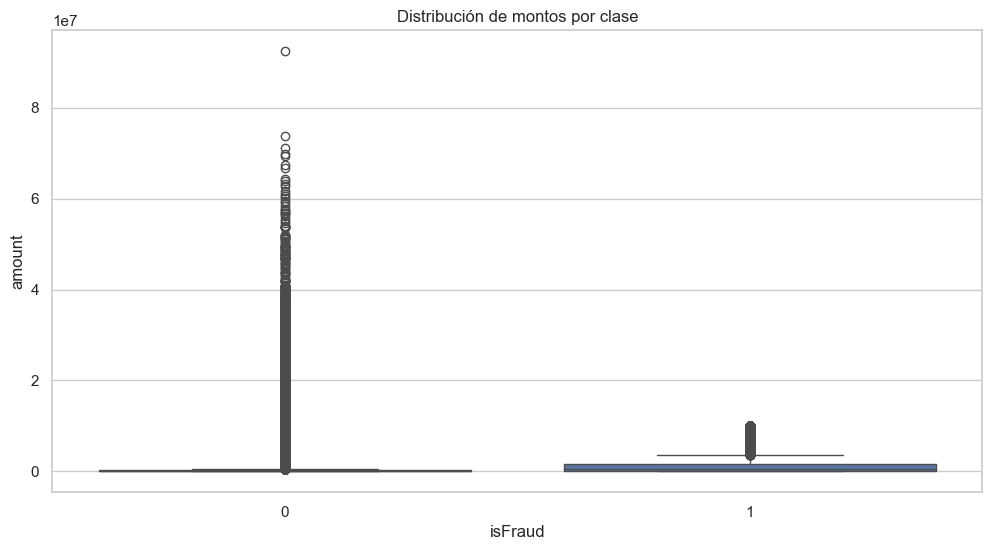

In [15]:
# Distribución de montos
sns.boxplot(x="isFraud", y="amount", data=df)
plt.title("Distribución de montos por clase")
plt.show()

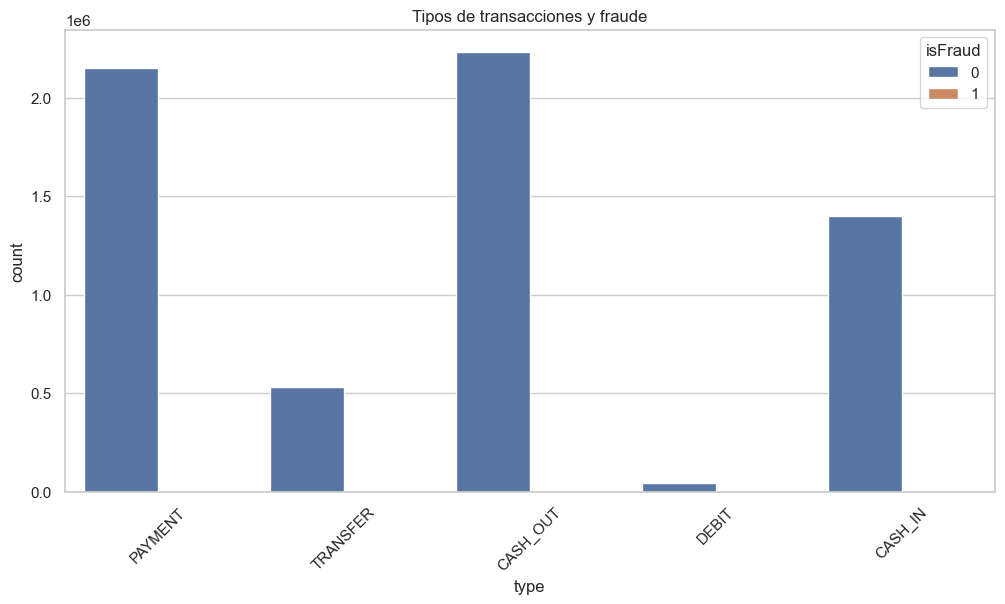

In [16]:
# Tipos de transacciones
sns.countplot(x="type", hue="isFraud", data=df)
plt.title("Tipos de transacciones y fraude")
plt.xticks(rotation=45)
plt.show()

In [17]:
# Casos de isFlaggedFraud
print("Casos isFlaggedFraud = 1:", df[df["isFlaggedFraud"]==1].shape[0])

Casos isFlaggedFraud = 1: 16


In [20]:
# Insight extra (de muestra.ipynb)
print("\nNúmero de TRANSFERs fraudulentos con balance destino = 0:",
      df[(df['type']=="TRANSFER") & (df['isFraud']==1) & (df['oldBalanceDest']==0)].shape[0])


Número de TRANSFERs fraudulentos con balance destino = 0: 4092


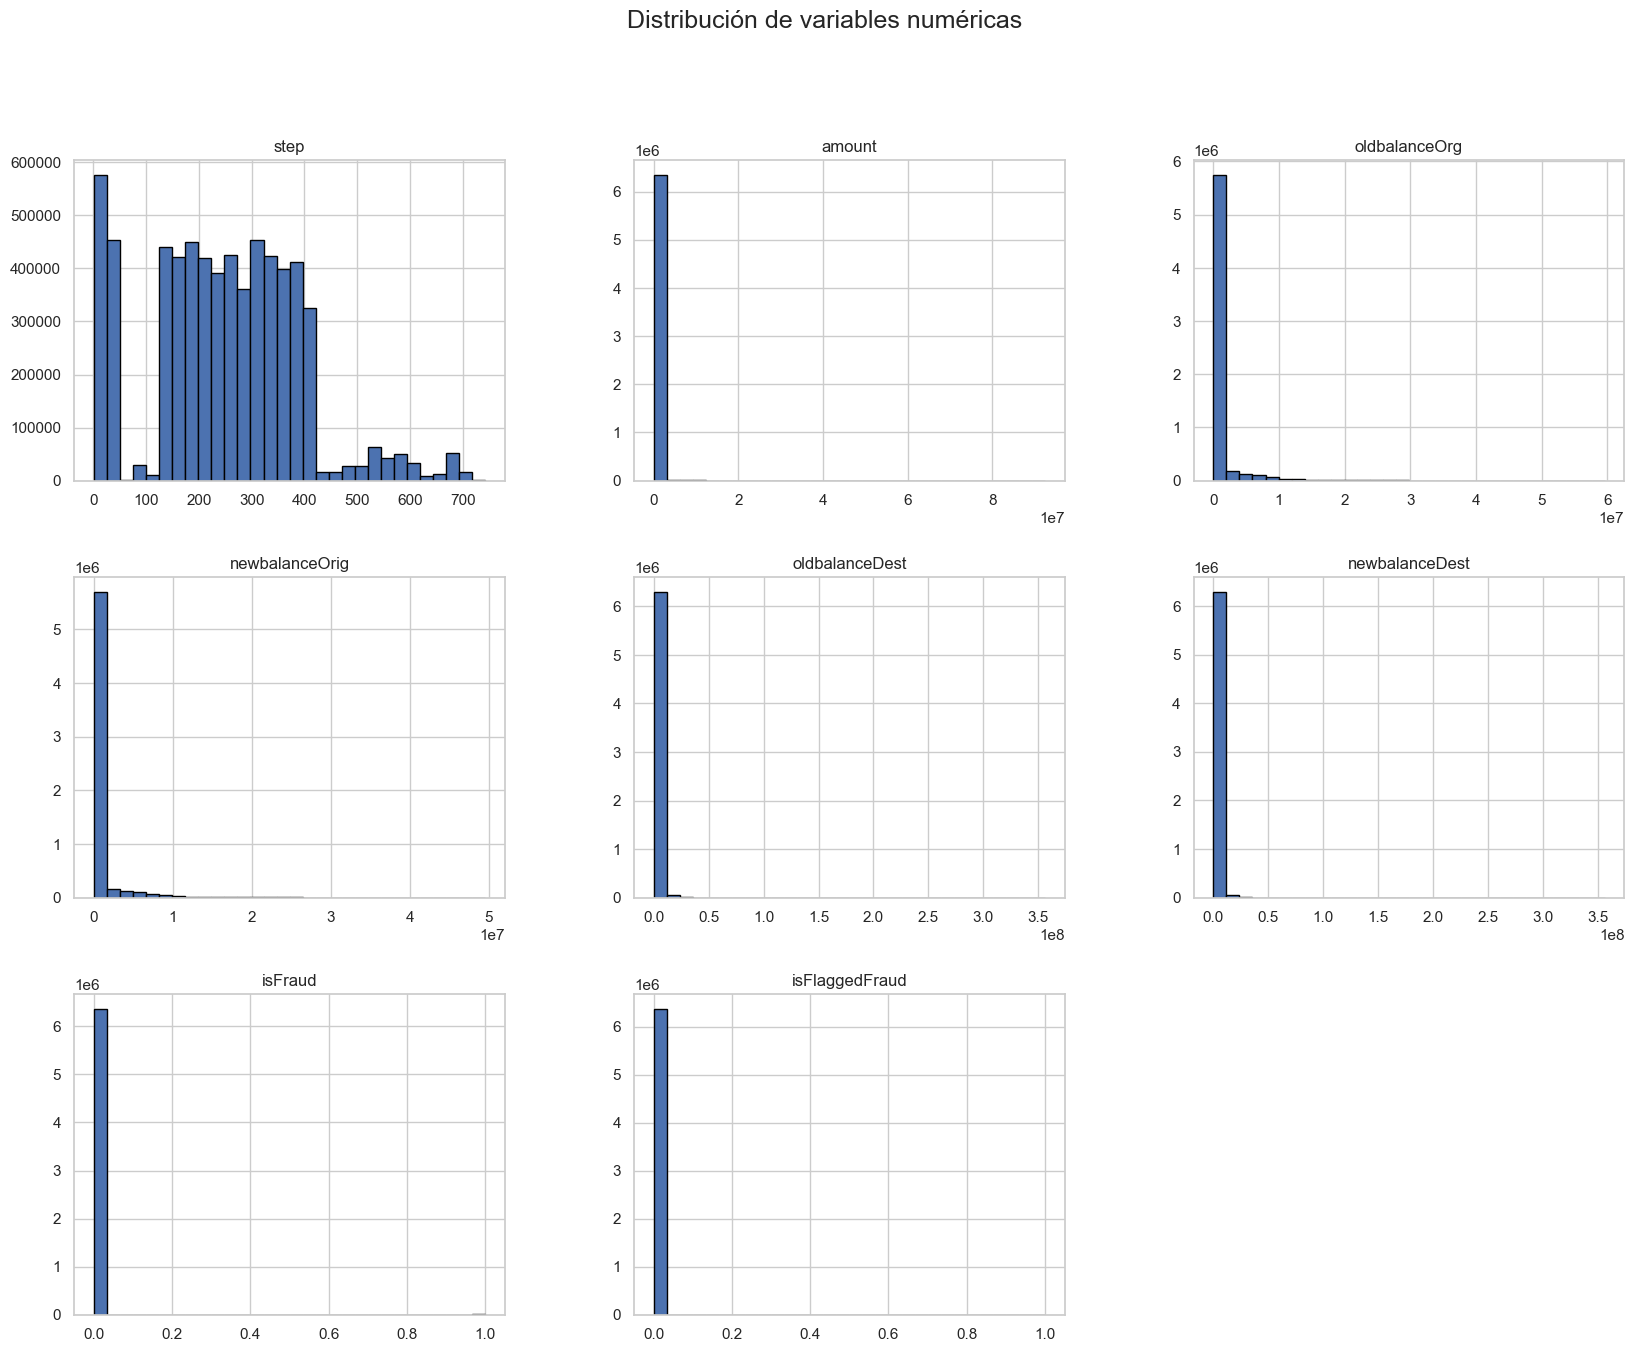

In [12]:
# Histogramas de todas las variables numéricas
df.hist(bins=30, figsize=(20,15), edgecolor="black")
plt.suptitle("Distribución de variables numéricas", fontsize=18)
plt.show()

C:\Users\Valentina Molina\AppData\Local\Temp\ipykernel_15240\967808646.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=top_values, palette="Set2")


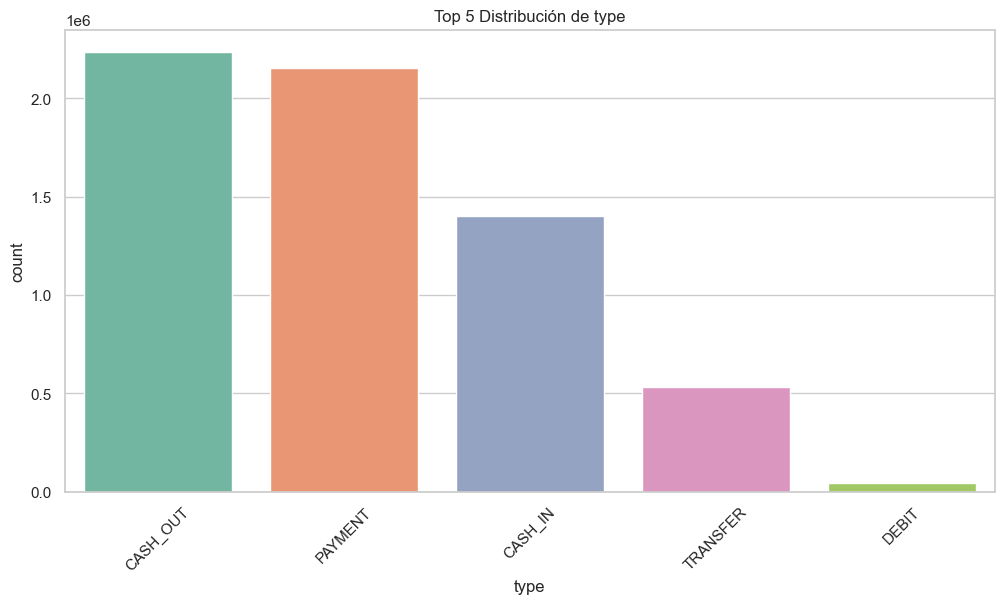

In [21]:
# Variables categóricas relevantes (excluyendo nameOrig y nameDest)
cat_cols = [col for col in df.select_dtypes(include=["object","category"]).columns 
            if col not in ["nameOrig","nameDest"]]

top_n = 5
for col in cat_cols:
    top_values = df[col].value_counts().nlargest(top_n).index
    sns.countplot(data=df, x=col, order=top_values, palette="Set2")
    plt.title(f"Top {top_n} Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()

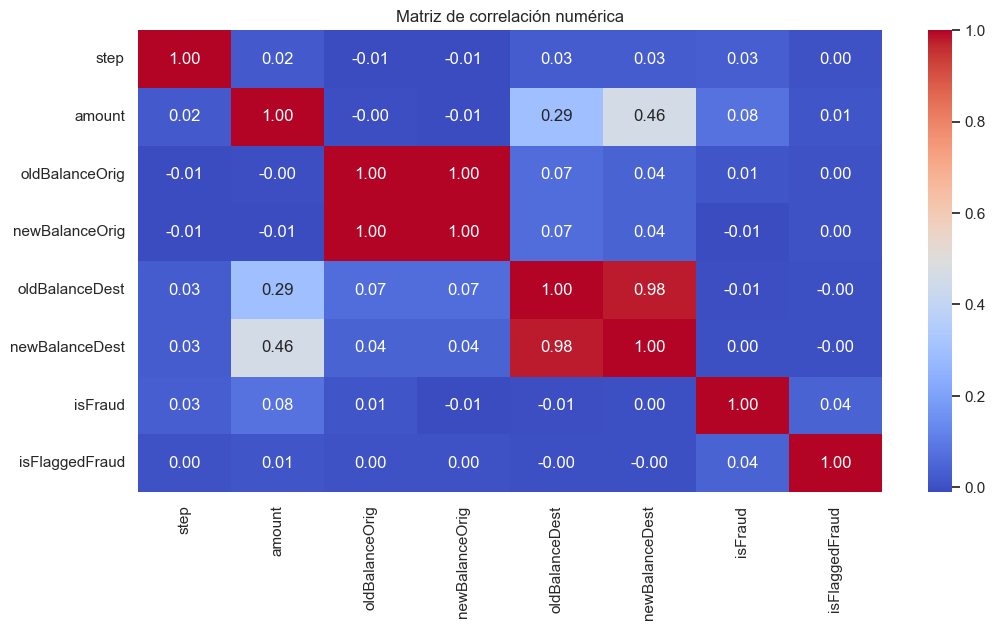

In [ ]:
# Correlación entre variables numéricas
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación numérica")
plt.show()

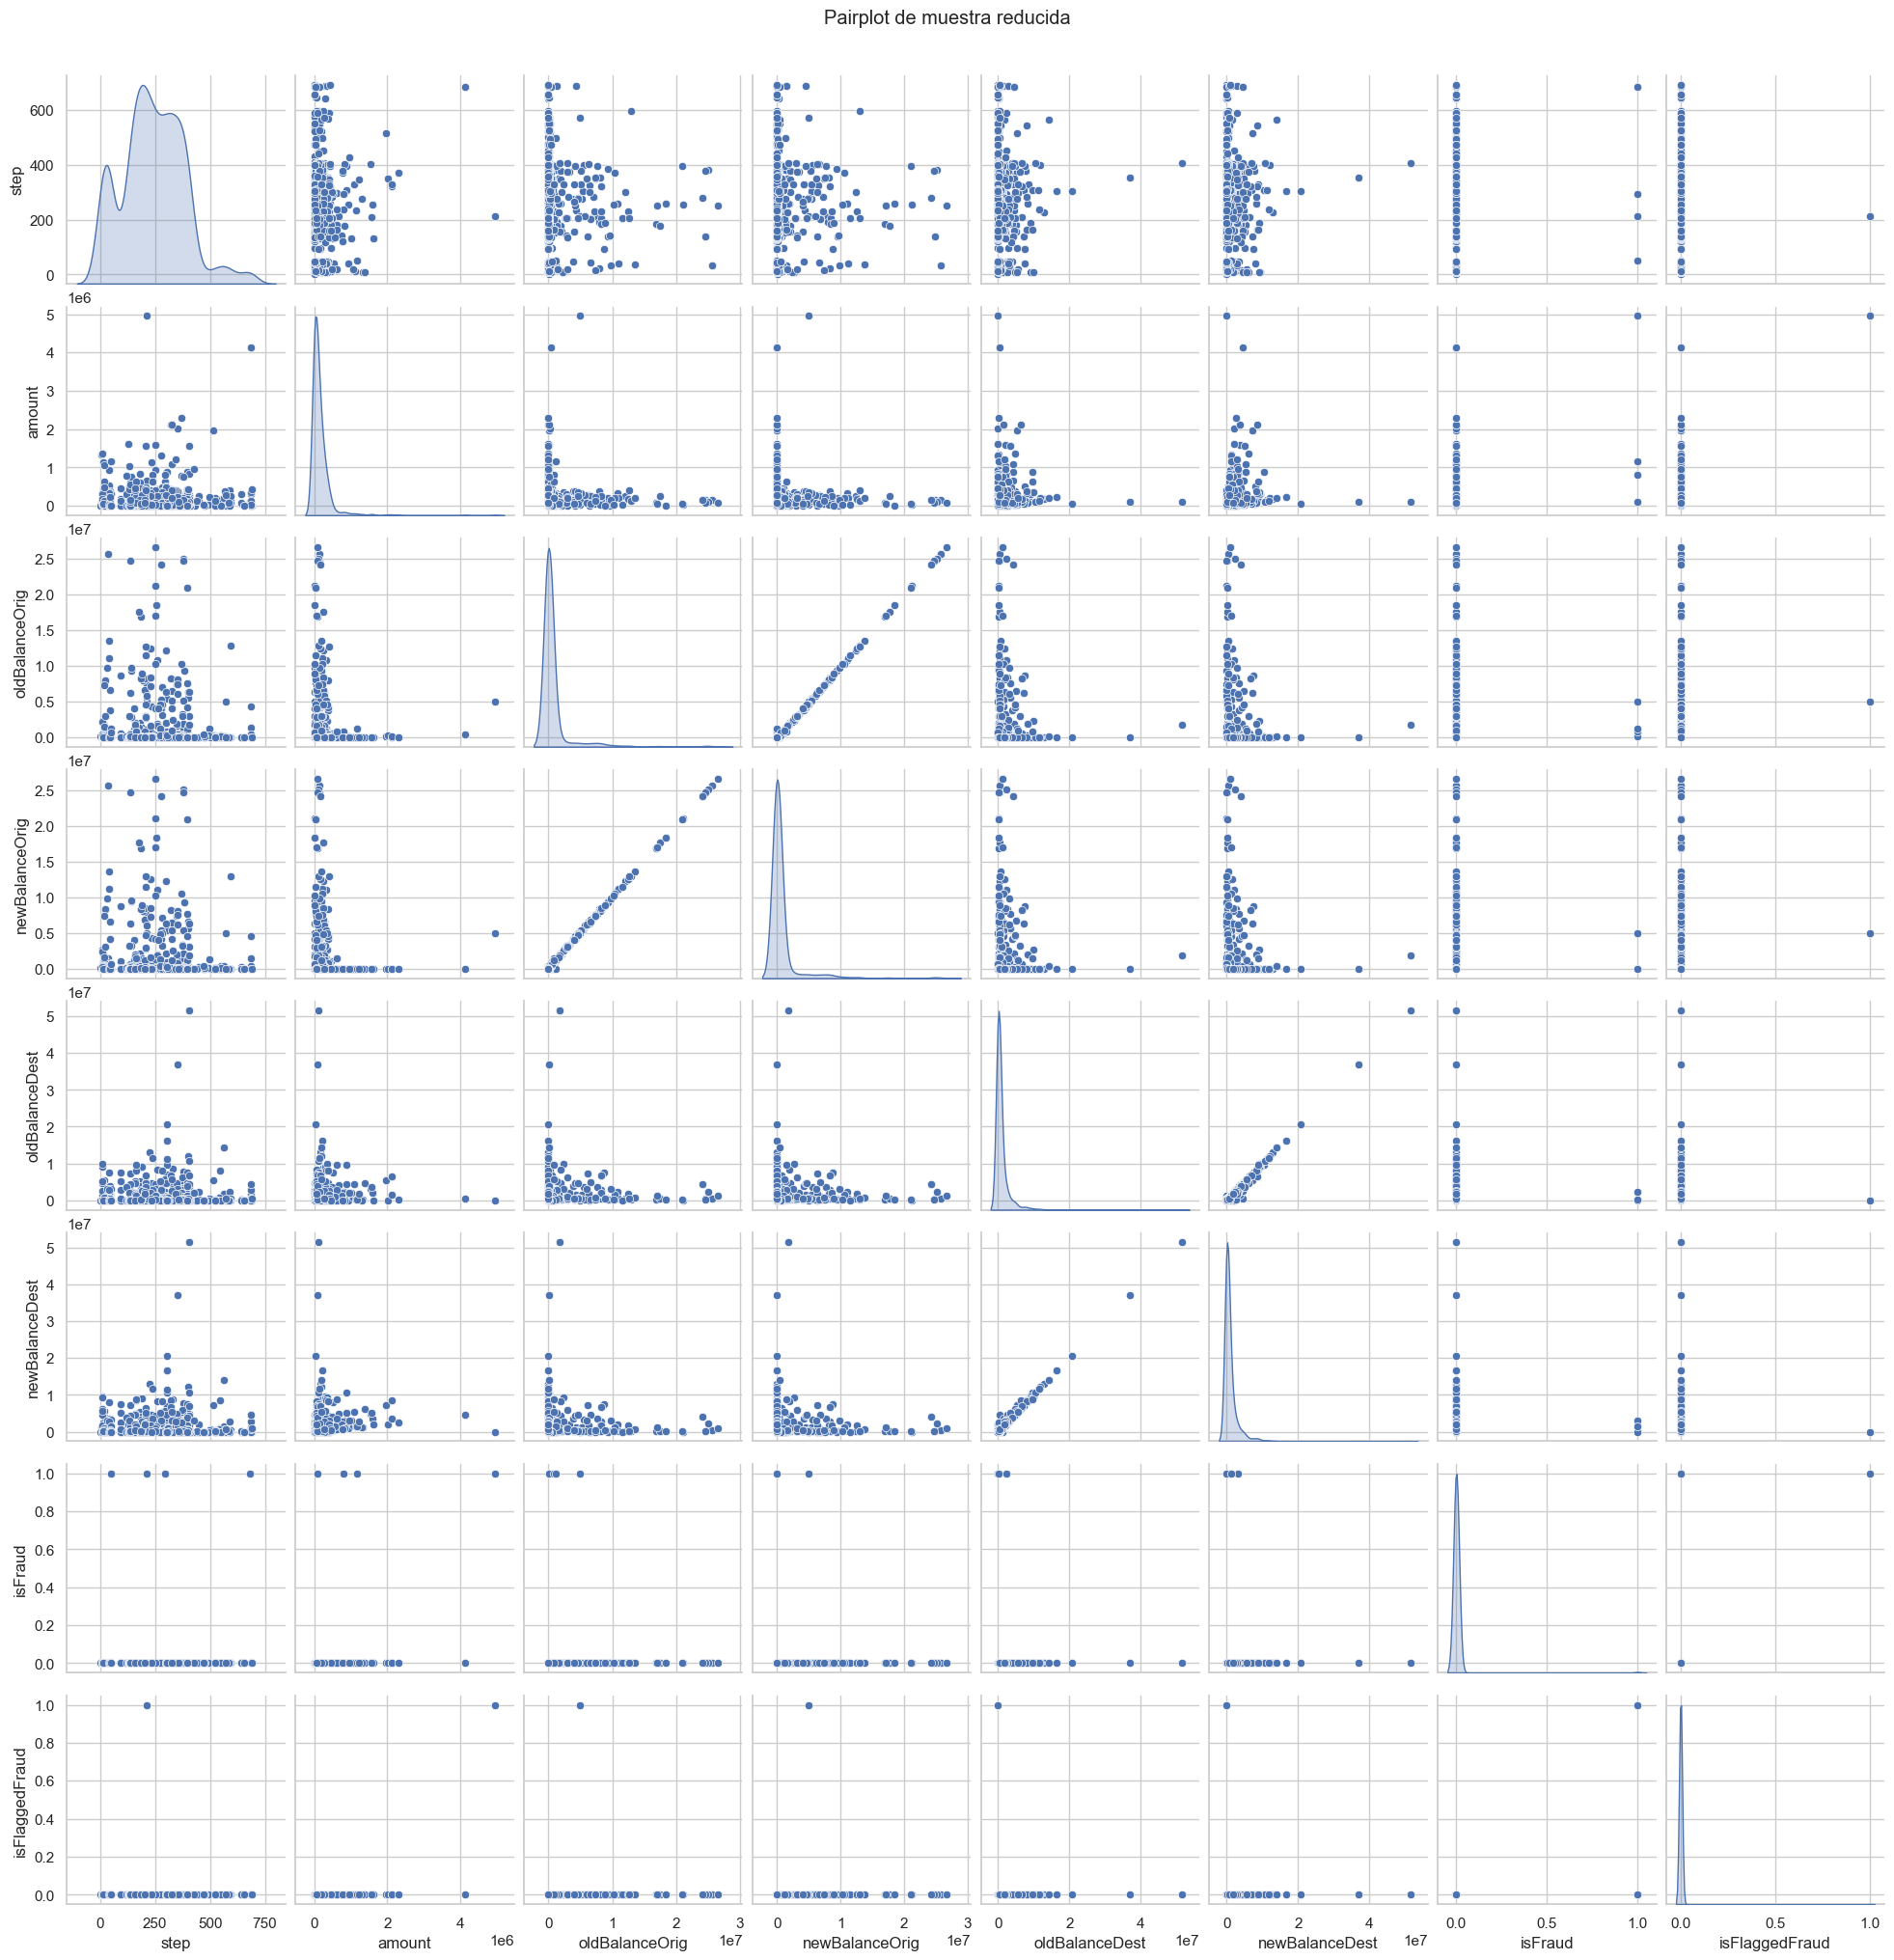

In [23]:
# Pairplot sobre muestra reducida
sample_pairplot = df.sample(1000, random_state=42)
sns.pairplot(sample_pairplot, diag_kind="kde")
plt.suptitle("Pairplot de muestra reducida", y=1.02)
plt.show()

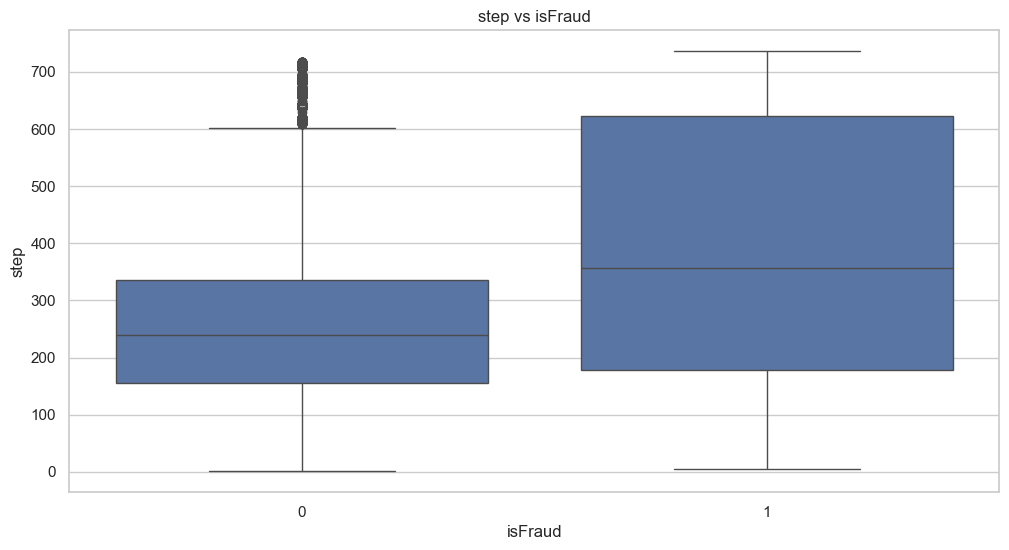

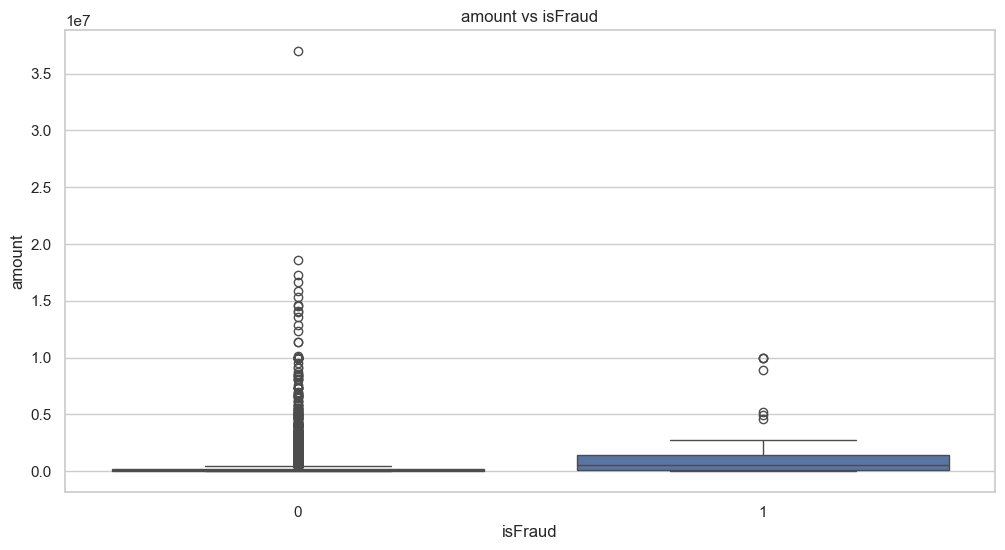

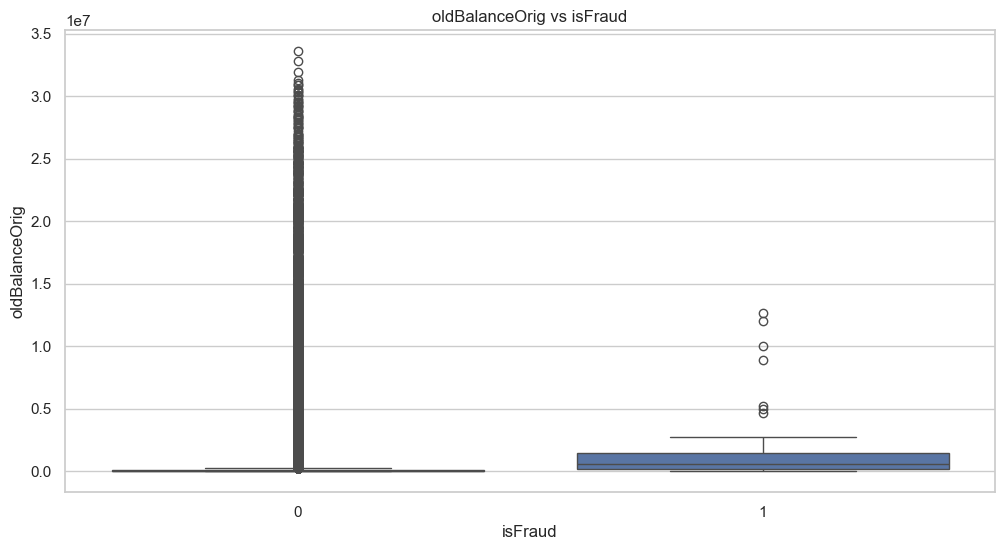

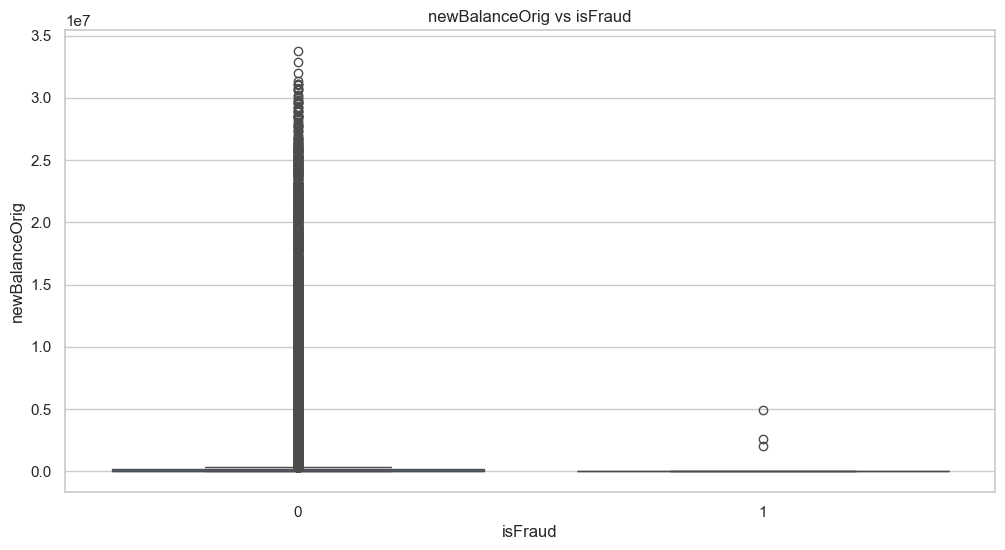

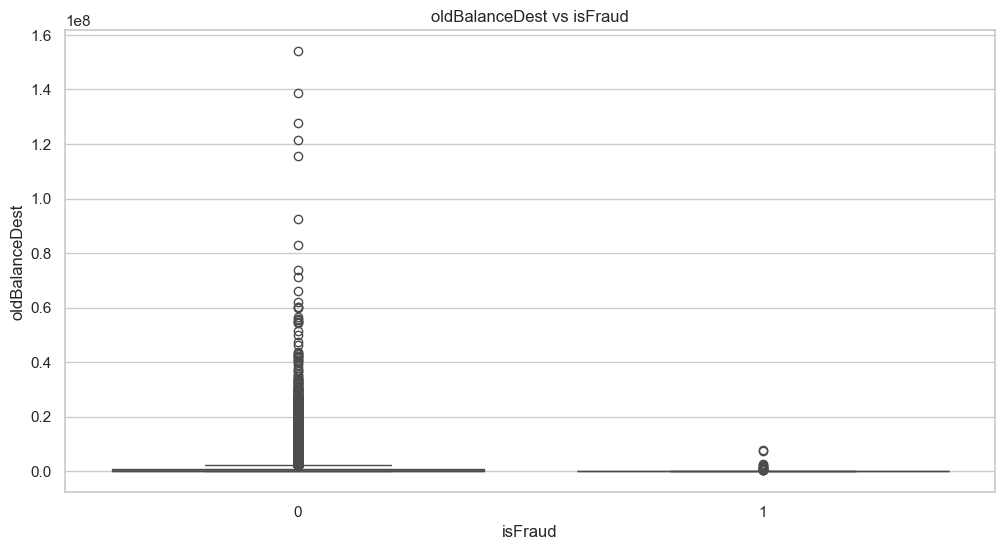

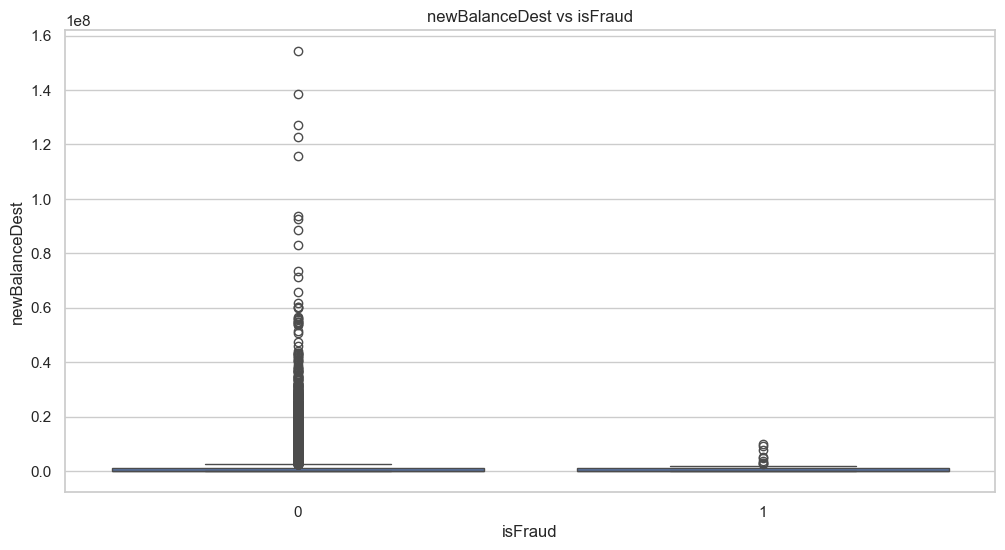

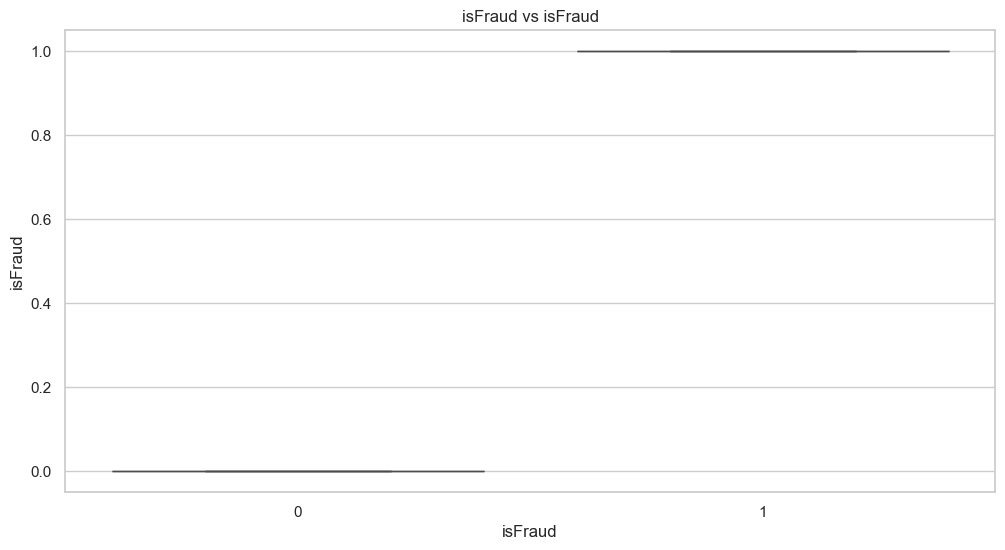

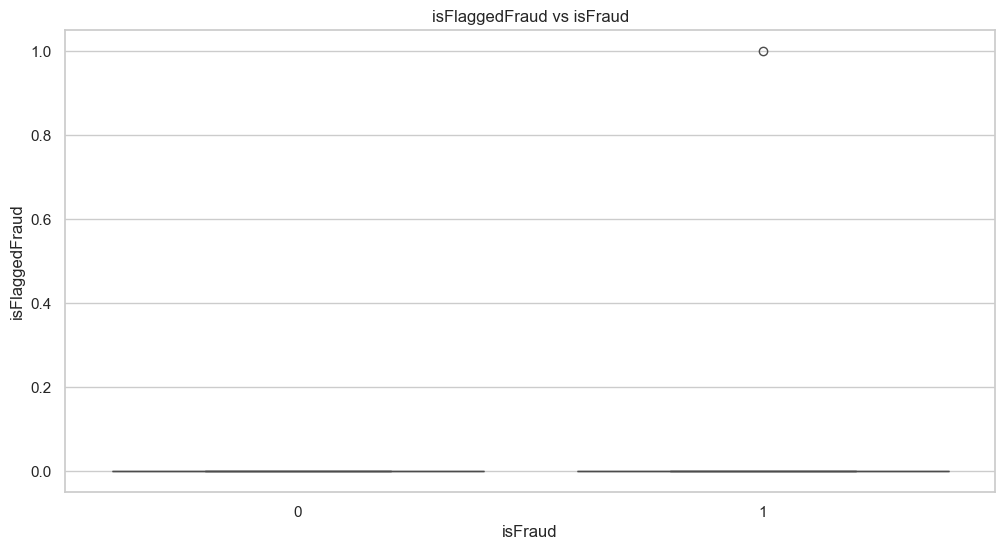

In [24]:
# Boxplots numéricos vs variable objetivo usando muestra
target = "isFraud" if "isFraud" in df.columns else None
num_cols = df.select_dtypes(include=np.number).columns
if target:
    sample_box = df.sample(50000, random_state=42)
    for col in num_cols:
        sns.boxplot(data=sample_box, x=target, y=col)
        plt.title(f"{col} vs {target}")
        plt.show()

In [31]:
# Variables de error en balances
df['errorBalanceOrig'] = df['newBalanceOrig'] + df['amount'] - df['oldBalanceOrig']
df['errorBalanceDest'] = df['oldBalanceDest'] + df['amount'] - df['newBalanceDest']

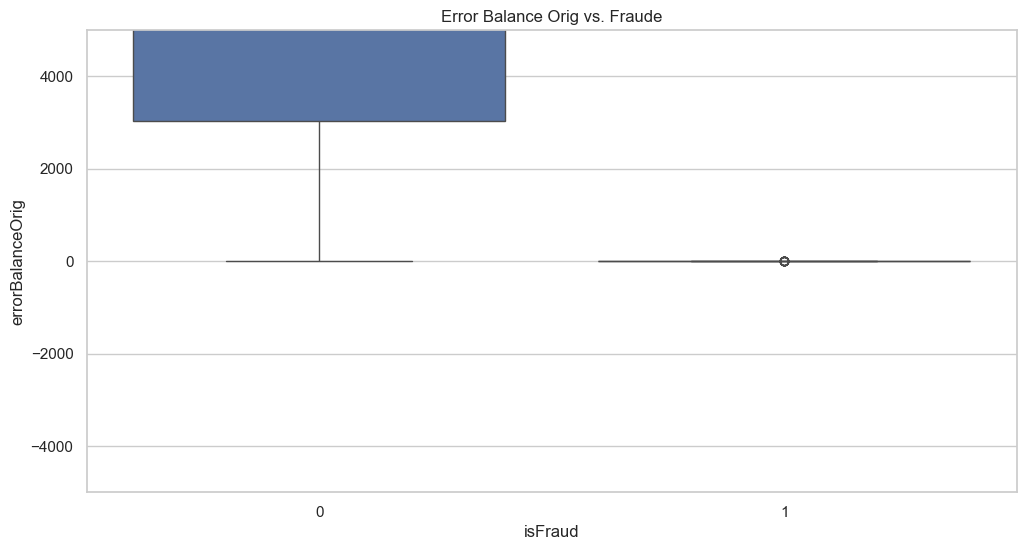

In [32]:
# Distribución del error en balances (origen)
sns.boxplot(x="isFraud", y="errorBalanceOrig", data=df)
plt.title("Error Balance Orig vs. Fraude")
plt.ylim(-5000, 5000)  # limitar eje Y para mejor visualización
plt.show()

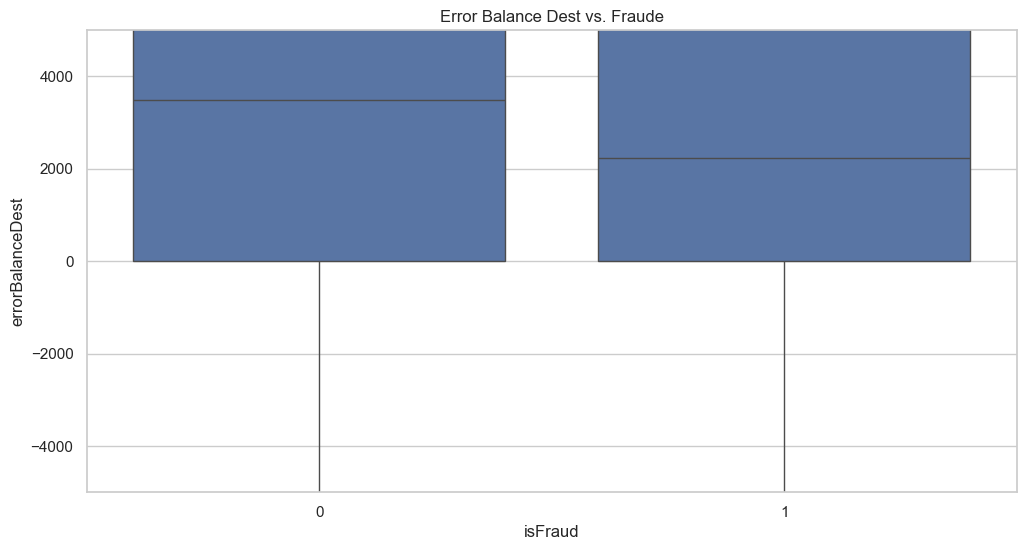

In [33]:
# Distribución del error en balances (destino)
sns.boxplot(x="isFraud", y="errorBalanceDest", data=df)
plt.title("Error Balance Dest vs. Fraude")
plt.ylim(-5000, 5000)
plt.show()

In [34]:
# Valores promedio por clase
print("Promedio de errorBalanceOrig:")
print(df.groupby("isFraud")["errorBalanceOrig"].mean())

print("\nPromedio de errorBalanceDest:")
print(df.groupby("isFraud")["errorBalanceDest"].mean())

Promedio de errorBalanceOrig:
isFraud
0    201338.558109
1     10692.325265
Name: errorBalanceOrig, dtype: float64

Promedio de errorBalanceDest:
isFraud
0     54692.231734
1    732509.301069
Name: errorBalanceDest, dtype: float64


En transacciones legítimas, los errores en balance de origen y destino son cercanos a cero, lo que refleja consistencia contable.
En cambio, en las transacciones fraudulentas los errores presentan valores muy alejados de cero, lo que evidencia discrepancias entre el saldo esperado y el registrado.
Esto sugiere que estas variables son indicadores valiosos de fraude y podrán ser utilizadas en etapas posteriores como nuevas características para el modelo.

6. Estrategia de Preprocesamiento

In [35]:
# Codificación de variable categórica
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])

In [36]:
# Selección de variables predictoras (ejemplo inicial)
X = df[['amount', 'oldBalanceOrig', 'newBalanceOrig',
        'oldBalanceDest', 'newBalanceDest', 'type_encoded']]
y = df['isFraud']

In [37]:
# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# División en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

7. Baseline de rendimiento

c:\Users\Valentina Molina\Documents\repositorios\Proyecto_Final_MLOps\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Valentina Molina\Documents\repositorios\Proyecto_Final_MLOps\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Valentina Molina\Documents\repositorios\Proyecto_Final_MLOps\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.00      0.00      0.00      1643

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



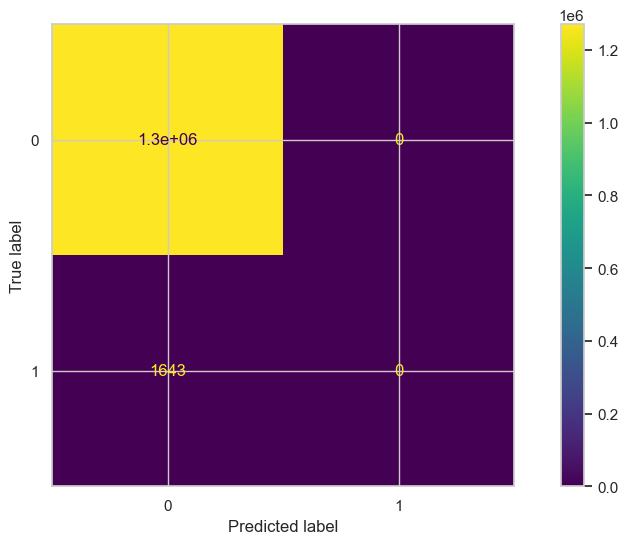

In [39]:
# DummyClassifier como baseline
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()